# Workbook 4: Local Search in categorical and continuous spaces

Overview of activities and objectives of this workbook:

1. The first part of this workbook will implement *Local Search* for a simple *binary* problem (One-max).
   - The One-max problem is simple; given an a random binary array, turn all values (i.e. 0's) to 1.  
     The quality of a solution is the number of 1s it contains - so it is sometimes called *Counting Ones*.
   - We will also evaluate the performance of the *Local Search* algorithm on the One-max problem with different complexities (number of values). <br><br>

2. The second part of this workbook will adapt the binary One-max problem to use *continuous* decision variables.
   - We will adapt the Local Search algorithm from part one to solve the continuous One-max problem.
   - For local search with continuous variables we will explore two different methods for generating the neighbouring candidate solutions:
       -  adding random (gaussian) noise, and
       -  using *gradient* information.

<div style="background-color:black;width:100%;height:10px"></div>

# Part 1: Local Search for binary One-max

Unlike the search algorithms covered in previous weeks, Local Search only considers the immediate neighbours of the current best candidate solution.  
- If any of the neighbours are an improvement on the current candidate solution then that solution is selected
- and the remaining neighbours are ignored/forgotten i.e. removed from the open list (see pseudocode below).

You can think of Local Search like climbing a hill.   
Each step you choose the direction that takes you higher towards the top and *not sideways or backwards*.   
 - So you stop if there are no uphill moves.
 - And you aren't allowed to backtrack by considering steps you *could* have taken 2 or 3 steps ago.

To consider local search in terms of the One-max problem:

1. If the random starting solution is [0, 1, 1, 0, 1], with quality 3

2. We then generate several neighbouring solutions, e.g.:
    - [0, 1, 1, 0, 0] with quality 2
    - [0, 1, 1, 1, 0] with quality 3
    - [0, 1, 1, 1, 1] with quality 4
    - and so on, changing other values

3. Then choose the best neighbour generated. In this case the 3rd one improves the quality so that is selected. The other two have either worse, or the same quality and so are discarded.

### Pseudocode for Local Search SelectAndMoveFromOpenList function

<div style="background:#F0FFFF;font-size:18pt;color:black">
<p style="color:darkred;font-size:18pt;margin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="font-size:18pt;margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd>bestChild &larr; <b>GetMemberWithHighestQuality</b>(openList)</A>
    <dd> <b>EMPTY</b>(openlist)&nbsp;&nbsp;&nbsp;&nbsp;<span style="background:pink">This prevents backtracking</span></dd>
    <dd>  <b>IF</b> BetterThan(bestChild, bestSoFar) <b>THEN</b> <br>
        &nbsp;&nbsp;&nbsp;&nbsp;bestSoFar &larr; bestChild <br>
        &nbsp;&nbsp;&nbsp;&nbsp;RETURN bestChild </dd>
    <dd> <b>ELSE</b> <br>&nbsp;&nbsp;&nbsp;&nbsp; RETURN None</dd>
</dl>
</div>

<div style="background-color:black;width:100%;height:3px"></div>
<br>
<div class="alert alert-block alert-info" style="color:black"><h2> Activity 1: Implementing local search for the binary One-max problem</h2>
    <ol>
    <li>Complete the second cell below which implements the <code>LocalSearch</code> class.</li>
    <li>We have provided an <code>__init__()</code> method with over-rides the default behaviour and creates a random starting point</li>
    <li>You need to complete the method <code>select_and_move_from_openlist()</code>. We have broken this down into <b>4</b> clearly marked small steps:</li>
        <ul>
            <li>Find the best candidate solution on the open list</li>
            <li>Clear the open list</li>
            <li>Check if the best candidate solution is a better solution</li>
            <li>Return the best candidate solution if it is an improvement, else return <code>None</code></li>
        </ul>
    <li> Test your implementation by running the third cell which uses your implementation to solve the <em>oneMax</em> problem.
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
The first step (finding the best solution on the open list) is the same as <b>Best-first search</b> from the previous week.<br>
    You can use <code>self.a_better_than_b()</code> to evaluate if one solutions quality is better than another.
</div>

**Run but do not edit the next cell** to import some relevant code.

In [1]:
# YOU MUST RUN THIS CELL BUT DO NOT EDIT IT OR YOU WILL BREAK THE NOTEBOOK
import sys, os
import numpy as np
from copy import deepcopy
# Import from the common directory
sys.path.append('../common')

from candidatesolution import CandidateSolution
from singlemembersearch import SingleMemberSearch
from problem import Problem
from onemaxproblem import OneMaxBinary, OneMaxContinuous

**Write your implementation where indicated in the cell below. Then run the cell.**

In [2]:
class LocalSearch(SingleMemberSearch):
    """Implementation of local search."""

    def __str__(self) -> str:
        """ return name"""
        return "local search"
    
    def __init__( self,
        problem: Problem,
        constructive: bool = False,
        max_attempts: int = 50,
        minimise=True,
        target_quality=1):
        """ call super class 
        then change to random starting point
        """
        super().__init__(problem,
                         constructive=constructive,
                         max_attempts=max_attempts,
                         minimise=minimise,
                         target_quality=target_quality)
        
        
        
        # over-ride default
        arrays_of_rands = np.random.choice(self.problem.value_set, size=self.problem.numdecisions)
        start_point =  self.open_list[0]
        start_point.variable_values= list(arrays_of_rands)

        # measure quality 
        start_point.quality = self.problem.evaluate(start_point.variable_values)
        if start_point.quality == self.target_quality:
            self.trials = 1
            self.result = start_point.variable_values
            self.solved = True

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Pops best thing from list, 
        clears rest of list, 
        then returns best thing
        relies on the presence of self.best_so_far

        Returns
        -------
        next working candidate (solution) taken from open list
           **if it is an improvement**
        None
           IF list is empty OR next thing is worse than best so far
        """
        next_soln = CandidateSolution()

        # check the open list isn't empty
        if len(self.open_list) == 0:
            self.runlog += "LS:empty open list\n"
            return None

        # get best child: start looking for it in position 0
        self.runlog += f"LS: {len(self.open_list)} children to examine\n"
        best_index = 0
        quality = self.open_list[0].quality
        best_so_far: int = quality
        
        # ====> insert your code below to copy the best solution from the open list into next_soln

        # Check if the open list is not empty
        if self.open_list:
            # Assume the first element is the best initially
            best_index = 0

            # Iterate over the open list to find the best solution
            for i in range(len(self.open_list)):
                if self.minimise:
                    # If minimization is required, look for the solution with the lowest quality
                    if self.open_list[i].quality < self.open_list[best_index].quality:
                        best_index = i
                else:
                    # If maximization is required, look for the solution with the highest quality
                    if self.open_list[i].quality > self.open_list[best_index].quality:
                        best_index = i

            # Remove and retrieve the best solution from the open list
            next_soln = self.open_list.pop(best_index)

        # <==== insert your code above to copy the best solution from the open list into next_soln

        self.runlog += (
            f"\t best child quality {best_so_far},"
            f"\n\t best so far {self.best_so_far}\n"
        )
        
        # ====> insert your code below here to clear the openlist
        
        self.open_list.clear()

        # <==== insert your code above here to clear the openlist

        # always accept first move
        improvement_found: bool 
        if self.trials == 1:
            improvement_found = True
        # otherwise there must be an improvement
        else:
            pass
            # value will depend on whether next_soln.quality improves on self.best_so_far
            # ====> insert your code below to set values of improvement_found and self.best_so_far

            # Check if the goal is to minimize
            if self.minimise:
                # If the new solution has better (lower) quality, update the best
                if next_soln.quality < self.best_so_far:
                    improvement_found = True
                    self.best_so_far = next_soln.quality
            else:
                # If the goal is to maximize and the new solution is better (higher), update the best
                if next_soln.quality > self.best_so_far:
                    improvement_found = True
                    self.best_so_far = next_soln.quality

            # <==== insert your code above to set values of improvement_found and self.best_so_far

        
        # return best offspring from open list or None if it doesn't improve on self.best_so_far
        # ====> insert your code below to manage the return
        if improvement_found:
            return next_soln
        else:
            return None
        # <==== insert your code above manage the return

**Run the next cell to test your code and produce feedback.**

In [3]:
# Define and create problem instance
num_vars = 20
my_binary_onemax = OneMaxBinary(N=num_vars)

# Create search
my_search = LocalSearch(my_binary_onemax,
                       constructive = False,
                       max_attempts= 500,
                       minimise=False,
                       target_quality=num_vars)

# Record quality of random starting point 
starting_quality = my_search.open_list[0].quality

#Run search
success = my_search.run_search()

#Feedback
if success:
    print(f'Run found the goal ({num_vars}) '
          f'starting from point with quality {starting_quality} '
          f'after examining {my_search.trials} solutions.')
else:
    print(f'Run failed to solve the problem in {my_search.max_attempts} trials\n'
          f'runlog is:\n {my_search.runlog}')
    completed_ok=False

Run found the goal (20) starting from point with quality 10.0 after examining 192 solutions.


<div style="background-color:black;width:100%;height:3px"></div>
<br>
<div class="alert alert-block alert-info" style="color:black"><h2> Activity 2: Evaluating your implementation of Local Search</h2>
    Once your code works and the cell above runs and finds a solution, it is time to evaluate its performance.<br>
    Because it usually starts from a different random place every time, Local Search is a <b>stochastic</b> algorithm (the technical term for an algorithm that has a <b>random</b> element). <br>This means that to analyse its behaviour we should run it several times and report the <em>average</em> number of solutions it tries before it finds the goal.<br>
    <br><b>How to get started:</b>
    <ol>
    <li>For each of the problem sizes (10, 15, 20, 25, 30) (i.e. num_vars) we will run the search 10 times and record the number of attempts needed to solve the problem.</li>
    <li>Then plot your results as a curve of mean values (y-axis) vs num_vars (x-axis) with error bars showing the standard deviation. The cell below shows you first introduction to the graphics package <b>matplotlib</b>.</li>
    <li>To do this you can use two nested loops. See hints below.
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b><br>
    <ol>
<li> If we <code>enumerate</code> a list, python gives us the index and value of each thing it contains.</li>
<li>Given three arrays: <br>
     - <code>sizes</code> to hold different values tested for the problem size (x-axis), e.g. problem sizes (10, 15, 20, 25, 30)<br>
    -  <code>means</code>  and <code>std_deviations</code> to hold the average and variability  of attempts for each size (y-axis),  <br>
then you can make a nice plot using the code snippets provided below.<br>

You can automate finding the values for these arrays with two nested loops.<br>

The first loop is <code>for idx, size in enumerate(sizes)</code> 
    <ul>
        <li>Make an array called <code>attempts</code> full of zeros of size REPEATS (e.g. 10)</li>
        <li>Then the second (inside) loop <code>for run in range(REPEATS)</code>:
            <ul>
                <li>make a new instance of the problem, of the appropriate size</li>
                <li>make a new search object <code>my_search</code></li>
                <li>call the <code>my_search.runsearch()</code> method</li>
                <li>store the number of solutions it looked at <code>my_search.trials</code> in <code>attempts[run]</code></li>
            </ul>
    <li>Now you can use numpy's built in functions e.g.<code>np.mean(attempts)</code> and <code>np.std(attempts)</code> <br>
    to calculate and store the mean and standard deviation of the number of attempts for this problem size <br>
    in  <code>means[idx]</code>  and <code>std_deviations[idx]</code></li>
    </ul>
    Then move on to the next position in your <sizes> array.
    </li></ol>
</div>

<div class="alert alert-block alert-warning" style="color:black">
<b>How to examine results when the algorithm contains randomness:</b><br>
Lots of AI algorithms- both for search/optimisation and machine learning - use some form of randomness. <br>
    This means that you might get a different result each time you run them on the same problem (or dataset).<br>
    So to understand or compare results (scientists typically call these <i>observations</i>) we need to look at:
<div>
    <div style="float:right">
    <img src="https://curvebreakerstestprep.com/wp-content/uploads/2021/04/standard-deviation.png" width="300" height="300" alt="Image of two curves with same mean but different standard deviations.">
    </div>
    <ol> 
        <li>The average case behaviour.<br>
        Normally we use the <b>mean</b>, which is calculated as the sum of the observed values, divided by the number of observations.</li>
        <li>The amount of difference between observations.<br>
        Usually we use the <b>Standard Deviation</b>, a measure of how much, on average, results differ from the mean (ignoring the sign of the difference).</li>
        </ol>
</div>
To give a simple example, lets say you run a test in which 5 people score 10, and 5 people score 0.<br>
The mean= (5*10 + 5*0)/10 = 5, but the standard deviation = 5 as well - since everyone gets a score 5 different from the mean. <br>
    If we rerun the test but this time everyone gets 4 or 6. Now our mean is still 5 (5*4 + 5*6 = 50), but the standard deviation will be 1. 
    <br>So smaller values of standard deviation means the results are more similar to each other.
<br><br> The image on the right shows frequency counts from two more realistic scenarios. <br>
    Each has the same number of observations (area under the curve) and  a spread of scores  around the same mean. 
    <br>In the case with more variability the peak of the curve is lower - because more of the cases are spread away from the mean.
</div>

**Write your code where indicated in the cell below then run it.**

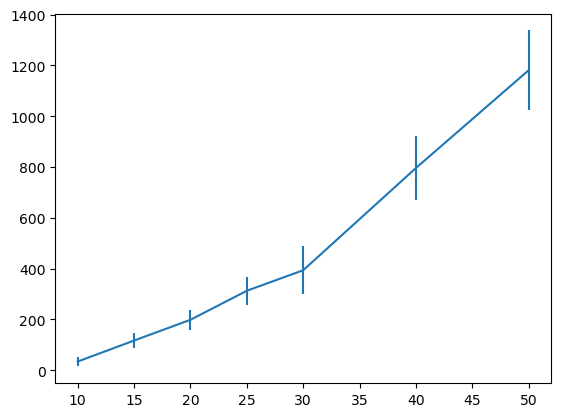

In [4]:
# max attempts 10000
MAX_ATTEMPTS = 10000

# number of repetitions
REPEATS = 10

#these are the three arrays to store your findings in
sizes = [10, 15, 20, 25, 30, 40, 50]
means = np.zeros(len(sizes))
std_deviations=np.zeros(len(sizes))

# ====> insert your code below here

# Loop over each problem size in the 'sizes' list
for idx, size in enumerate(sizes):
    # Initialize an array to store the number of attempts for each run
    attempts = np.zeros(REPEATS)
    
    # Perform multiple runs for statistical reliability
    for run in range(REPEATS):
        # Create a OneMaxBinary problem instance with the given size
        problem = OneMaxBinary(N=size)
        
        # Initialize the local search algorithm
        my_search = LocalSearch(
            problem, 
            constructive=False, 
            max_attempts=MAX_ATTEMPTS, 
            minimise=False, 
            target_quality=size
        )
        
        # Run the local search
        my_search.run_search()
        
        # Record the number of trials it took to reach the target solution
        attempts[run] = my_search.trials

    # Compute the mean number of attempts across all runs for this problem size
    means[idx] = np.mean(attempts)
    
    # Compute the standard deviation to measure variation in attempts
    std_deviations[idx] = np.std(attempts)

# <==== insert your code above here

# for making the plots
from matplotlib import pyplot as plt
# plot results    
plt.errorbar(sizes, means, yerr=std_deviations)
plt.show()

<div style="background:black;width:100%;height:10px"></div>

# Part 2: Local Search for continuous One-max

<div class="alert alert-block alert-warning" style="color:black">
    <h2> Activity 3: Adapting local search for a continuous problem</h2>
    <h3> This is a stretch activity for the more confident coders.</h3>
    <p>For continuous problems you will need to adapt your local search class.</p>
    <p>This requires adapting more of the methods from the single member search class</p>
    <p>I've suggested code that changes the <code>__init__</code> method 
            to initialise with appropriate continuous values,
        and stores the number of samples to take from the neighbourhood each iteration, and whether to use gradient-based search or not.</p>
    <p> <b>So the things you need to do are:</b>
    <ol>
        <li> Over-ride the <code>select_and_move_from_openlist(self)</code> method
        from your LocalSearch class so that it now:
            <ul>
            <li> Makes a copy of the best thing in the open list.</li>
            <li> Updates <code>self.best_so_far</code> if appropriate.</li>
            <li> Clears the open list</li>
            <li> returns the copied solution</li> 
            </ul>
        <li> Look through the new  <code>run_search()</code> method I have provided and make sure you understand it.<br>
            Then <b>complete</b> the method where indicated to make it <b>elitist</b>. 
            In other words, it should keep the current working ccandidate if all its offsprintg are worse..<br>
            <b>You can achieve this in one line of code!</b>
            </li> 
        </ol>

 <h3> This version of the problem has a quality function that is the difference to  the target - so it needs to be minimised</h3>   
    <ul>  
        <li> Values are allowed to come from the range [0,2]  </li>
        <li> The target/goal is the sequence [1.0,1.0,...1.0] (but you could change this)</li>
        <li> The <em>cost</em> is 0.5 * the sum of the squared differences in each position <br>
        We will see this again it Machine Learning, where it is called the <em> loss</em> function.<br>
            It has the nice property of being <em> differentiable</em> i.e., we can calculate  the local <em>gradient</em><br>
            - what direction to move from the current solution to reduce the errors/cost  fastest. </li>
        <li>\We  provide that <em>get_gradient() method</em> so you can try both approaches described in the lecture</li> 
        </ul>
 </div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
    <ol>
        <li>The first step is very similar to the first activity. The key difference is we are now keeping candidate solutions that are equally as good as the current best.</li>
        <li>For the second step, I've given you a simplified version of the <code>run_search()</code> method from the <code>SingleMemberSearch</code> class.</li>
        <li>Note: this version of the problem has a quality function that is the difference to the target so it needs to be minimised.</li>
</div>

**Write your implementation where indicated in the code cell below then run it.**

In [5]:
class LocalSearchContinuous(SingleMemberSearch):
    """Implementation of local search for continuous problems.
      Assumes the search mode is perturbative.
      Extends single member search by doing explicit sampling of neighbourhood
      and if not stopping if no improvment is  found in an iteration
      Parameters
      ---------
      sample_size(int): 
          number of neighbours to generate each iteration
          default 10
      use_gradient(bool): 
          whether to use the gradient instead of random changes
          if the problem supports it.
          If set, assume sample_size is 1
          default False
      learning_rate(float)
          multiplier for gradient if used
          default 0.5

    """

    def __str__(self) -> str:
        return "local search continuous"
    
    def __init__(
        self,
        problem: Problem,
        constructive: bool = False,
        max_attempts: int = 50,
        minimise:bool=True,
        target_quality:float=1,
        sample_size:int = 10,
        use_gradient:bool=False,
        learning_rate=0.5
    ):   
        super().__init__(problem, constructive=constructive,
                       max_attempts=max_attempts,
                       minimise=minimise,
                       target_quality=target_quality)
        print(f'self.target_quality is {self.target_quality}') 
        
        #reinitialise to random continuous values in right range
        self.num_vars  = len(self.open_list[0].variable_values)        
        for decision in range(self.num_vars):
            self.open_list[0].variable_values[decision]= self.rand_in_range()

        #re-evaluate
        quality = self.problem.evaluate(self.open_list[0].variable_values)
        self.open_list[0].quality=quality    
        self.trials=1
        print(f'starting quality {quality}\n')

        # Initialize best_solution with the starting solution
        self.best_solution = self.open_list[0]

        #store the number of neighbours to examine each iteration 
        self.sample_size = sample_size
        self.learning_rate = learning_rate

        #does the problem support calculation of gradients
        self.use_gradient= use_gradient
        if self.use_gradient: 
            try:
                _=self.problem.get_gradient()
                self.sample_size = 1
            except: #in case that doesn't work
                self.use_gradient=False

    def rand_in_range(self)->float:
        """ generates a random number in the range
        specified by the problem
        """
        lowest_val = self.problem.value_set[0]
        val_range = self.problem.value_set[1] - self.problem.value_set[0]
        return np.random.random()*val_range +lowest_val
    


    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Pops best thing from list, clears rest of list, then returns best thing
        and updates  self.best_so_far

        Returns
        -------
        next working candidate (solution) taken from open list
        None
           IF list is empty r
        """
        next_soln = CandidateSolution()

        # edge cases
        if len(self.open_list) == 0:
            self.runlog += "LS:empty open list\n"
            return None

        ## =====> insert your code below here to pop the best solution from the open_list into next_soln

        # Assume the first element in the open_list is the best
        best_index = 0

        # Iterate through the open_list to find the solution with the lowest quality
        for i in range(len(self.open_list)):
            if self.open_list[i].quality < self.open_list[best_index].quality:
                best_index = i  # Update best_index if a better (lower quality) solution is found

        # Remove and retrieve the best solution from the open_list
        next_soln = self.open_list.pop(best_index)

        ## <====== insert your code above here to pop the best solution from the open_list into next_soln


        
        # ===> insert your code below here to update self.best_so_far

        # Check if the new solution has a better (lower) quality than the best so far
        if next_soln.quality < self.best_so_far:
            # Update the best quality found so far
            self.best_so_far = next_soln.quality

        # <=== insert your code above here to update self.best_so_far    


        # ===> insert your code below here to clear the openlist

        # Remove all elements from the open list
        self.open_list.clear()

        # <=== insert your code above here to clear the open list

        return next_soln
        
    def run_search(self) -> bool:
        """The main loop for single member search.
        Returns True/False for success or failure.
        """

        while self.trials < self.max_attempts and not self.solved:
            working_candidate = self.select_and_move_from_openlist()
            if working_candidate is None:
                return False
            
            for neighbour in range(self.sample_size):
                #GENERATE
                neighbour = deepcopy(working_candidate)
                if self.use_gradient:
                    changes = self.problem.get_gradient() *self.learning_rate
                else:
                    changes= np.random.normal(size= self.num_vars) *self.learning_rate
                for pos in range(self.num_vars):
                    neighbour.variable_values[pos] += changes[pos]

                # TEST
                try:
                    neighbour.quality = self.problem.evaluate(
                    neighbour.variable_values
                    )
                    reason=''
                except ValueError as e:
                    reason=e

                self.trials += 1
                self.update_working_memory(neighbour,reason)
                if self.solved:
                    return True
                
            # end over loop of neighbors of working candidate
            # ===> insert your code below to stop search losing the best solution so far

            # If the current candidate solution has better (lower) quality than the best solution so far
            if working_candidate.quality < self.best_solution.quality:
                # Update the best_solution to preserve the best one found during the search
                self.best_solution = working_candidate

            # <=== insert your code above to stop search losing the best solution so far
# while loop has ended
        if not self.solved:
            self.runlog += "failed to find solution to the problem in the time allowed!"
        return self.solved
        

**Run the cell below to test your implementation**

In [6]:
# define and create problem instance
num_vars = 10
continuous_onemax = OneMaxContinuous(N=num_vars)

# search using option 1 from the lectures - adding Gaussian noise to create neighbours
my_search2 = LocalSearchContinuous( 
                        continuous_onemax,
                        constructive = False,
                        max_attempts= 10000,
                        minimise=True,
                        learning_rate=0.05,
                        target_quality=0.0
                                 )
success = my_search2.run_search()

#Feedback
if success:
    print(f'Local Search solved the problem '
          f'after {my_search2.trials} attempts.\n'
          f'solution {my_search2.result}\n'
          f'quality {my_search2.problem.evaluate(my_search2.result)}')
else:
    print(f'Failed to solve the problem in {my_search2.max_attempts} trials\n'
          #f'runlog is:\n {my_search2.runlog}'
)

self.target_quality is 0.0
starting quality 1.01

Local Search solved the problem after 445 attempts.
solution [0.963578973846842, 1.0254869161227345, 0.9996534405551406, 0.9655813853770976, 0.986798469349685, 1.0093540186007397, 1.0344096527914024, 1.0002933406973895, 0.9690038546369221, 0.9706996230000972]
quality 0.0


### Comparing randomised vs gradient-based search.
The cell below uses your code, and still works in a series of iterations, but does not make a set of neighbours by adding noise.  
Instead, at each iteration  it makes a single neighbour, by estimating the **gradient** - the direction with the greatest slope towards the target -  and then taking a small step in that direction.

**Run the cell below** and compare the run-times with randomised results you got before.

In [7]:
# search using option 2 from the lectures - using the gradient information
mysearch3 = LocalSearchContinuous(continuous_onemax,
                        constructive = False,
                        max_attempts= 500,
                        minimise=True,
                        target_quality=0.0,
                        use_gradient=True,
                        learning_rate=0.5)    

success = mysearch3.run_search()
if success:
    print(f'Local Search solved the problem '
          f'after {mysearch3.trials} attempts.\n'
          f'solution {mysearch3.result}\n'
          f'quality {mysearch3.problem.evaluate(mysearch3.result)}')
else:
    print(f'failed to solve the problem in {mysearch3.max_attempts} trials\n'
          f'runlog is:\n {mysearch3.runlog}')

self.target_quality is 0.0
starting quality 1.83

Local Search solved the problem after 6 attempts.
solution [0.9973869313774997, 1.0224300849931982, 1.0030886625007196, 1.0160053942794058, 0.9859618352764374, 1.0299883957816427, 0.9816446063392333, 1.0312172381508118, 1.0192921840623017, 1.0030371382818117]
quality 0.0


### It's  time to experiment
- How do these two approaches behave as the size of the problem increases: try 5,10,15,20 variables?
- How does the variability/reliability of the approaches change if you do repeat runs?
- How **Robust**  are the methods to tweaking the parameters that change their behaviour?
  - For the first version (`my_search2`) the `learning_rate` parameter controls the size of the random changes made to the working candidate. This will probably have  the biggest impact.
  - Lots of research papers (including some of Jim's PhD.) have looked at how to control this effectively.

<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</li>
    </ol>
</div>